# CNN

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the directories for your dataset
train_dir = "thermal images UL/Train"
val_dir = "thermal images UL/Val"
test_dir = "thermal images UL/Test"

# Define hyperparameters
batch_size = 32
epochs = 10
input_shape = (224, 224, 3)  # Adjust the input shape according to your images

# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data augmentation for validation and test data (only rescaling)
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators for loading and augmenting images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical'
)

# Create a CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_generator.class_indices), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    verbose=1
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

# Save the model for future use
model.save("CNN.h5")


Found 635 images belonging to 6 classes.
Found 167 images belonging to 6 classes.
Found 85 images belonging to 6 classes.
Epoch 1/10
20/20 [==============================] - 39s 2s/step - loss: 1.7660 - accuracy: 0.3370 - val_loss: 1.5283 - val_accuracy: 0.3892
Epoch 2/10
20/20 [==============================] - 30s 1s/step - loss: 1.5271 - accuracy: 0.4189 - val_loss: 1.3807 - val_accuracy: 0.3892
Epoch 3/10
20/20 [==============================] - 32s 2s/step - loss: 1.3991 - accuracy: 0.4346 - val_loss: 1.2129 - val_accuracy: 0.4192
Epoch 4/10
20/20 [==============================] - 31s 2s/step - loss: 1.3196 - accuracy: 0.4567 - val_loss: 1.1596 - val_accuracy: 0.5629
Epoch 5/10
20/20 [==============================] - 32s 1s/step - loss: 1.3695 - accuracy: 0.4709 - val_loss: 1.1344 - val_accuracy: 0.5449
Epoch 6/10
20/20 [==============================] - 34s 2s/step - loss: 1.3138 - accuracy: 0.4913 - val_loss: 1.0750 - val_accuracy: 0.5988
Epoch 7/10
20/20 [====================

In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

6/6 [==============================] - 2s 247ms/step - loss: 0.9845 - accuracy: 0.6587
Validation Loss: 0.98
Validation Accuracy: 0.66


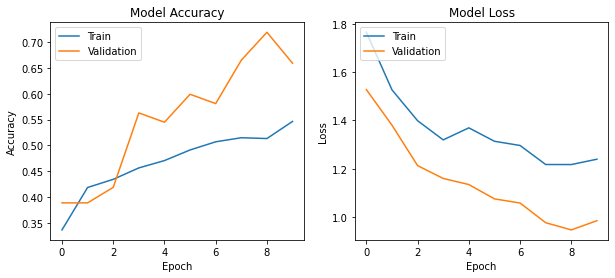

In [3]:
# After training, evaluate the model using the validation data
val_loss, val_accuracy = model.evaluate(val_generator)
print(f'Validation Loss: {round(val_loss,2)}')
print(f'Validation Accuracy: {round(val_accuracy,2)}')

# Plot the training history
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

3/3 [==============================] - 1s 266ms/step


C:\Users\karthik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\karthik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\karthik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

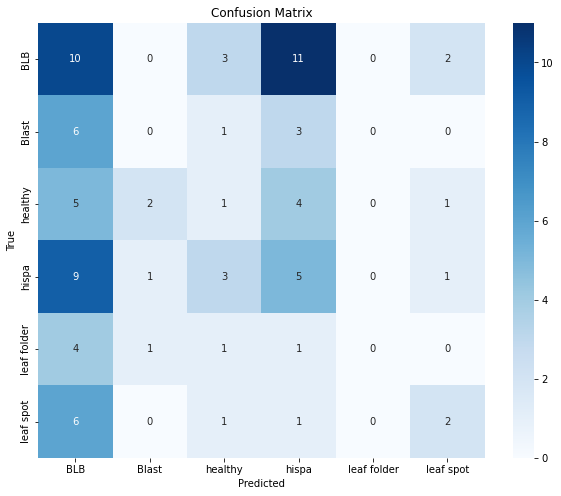

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict labels for the test set
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
true_classes = test_generator.classes

# Calculate the confusion matrix
confusion_mtx = confusion_matrix(true_classes, y_pred_classes)

# Calculate accuracy
accuracy = accuracy_score(true_classes, y_pred_classes)

# Generate a classification report
class_labels = list(test_generator.class_indices.keys())
classification_rep = classification_report(true_classes, y_pred_classes, target_names=class_labels)


# Generate a confusion matrix plot
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [5]:
print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.21176470588235294

Classification Report:
               precision    recall  f1-score   support

         BLB       0.25      0.38      0.30        26
       Blast       0.00      0.00      0.00        10
     healthy       0.10      0.08      0.09        13
       hispa       0.20      0.26      0.23        19
 leaf folder       0.00      0.00      0.00         7
   leaf spot       0.33      0.20      0.25        10

    accuracy                           0.21        85
   macro avg       0.15      0.15      0.14        85
weighted avg       0.18      0.21      0.19        85



In [21]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(image_path, model, class_labels, target_size=(224, 224)):  # Update target_size
    # Load the image
    img = image.load_img(image_path, target_size=target_size)
    
    # Convert the image to a NumPy array and preprocess it
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the image data

    # Use the trained model to make a prediction
    prediction = model.predict(img_array)

    # Get the class label with the highest probability
    predicted_class = np.argmax(prediction)

    # Get the predicted class label and its corresponding accuracy
    predicted_class_label = class_labels[predicted_class]
    prediction_accuracy = prediction[0][predicted_class]

    # Display the image
    plt.imshow(img)
    plt.axis('off')

    # Print the predicted class and accuracy
    print(f'Predicted Class: {predicted_class_label}')
    print(f'Prediction Accuracy: {prediction_accuracy:.2f}')

1/1 [==============================] - 0s 48ms/step
Predicted Class: healthy
Prediction Accuracy: 0.35


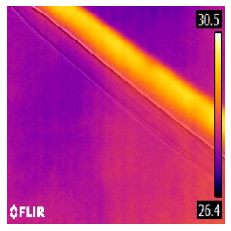

In [22]:

# Usage example:
image_path = 'thermal images UL/Test/healthy/thermalimage5c.jpg'
predict_image(image_path, model, list(train_generator.class_indices.keys()))


# Autoencoder

In [23]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, accuracy_score

# Load and preprocess the dataset
image_size = (128, 128)
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

# Define the autoencoder model
input_img = layers.Input(shape=(128, 128, 3))
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2))(x)

# Classification layer (classifier head)
x = layers.Flatten()(encoded)
x = layers.Dense(128, activation='relu')(x)
output = layers.Dense(train_generator.num_classes, activation='softmax')(x)

# The combined model
model = models.Model(inputs=input_img, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()



Found 635 images belonging to 6 classes.
Found 167 images belonging to 6 classes.
Found 85 images belonging to 6 classes.
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
     

In [24]:
# Train the model
epochs = 4  # Note: You might want to increase the number of epochs
history = model.fit(train_generator,
                    epochs=epochs,
                    validation_data=val_generator)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
cls_report = classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys())



Epoch 1/4
20/20 [==============================] - 11s 519ms/step - loss: 1.4024 - accuracy: 0.4677 - val_loss: 0.8531 - val_accuracy: 0.6587
Epoch 2/4
20/20 [==============================] - 9s 439ms/step - loss: 0.7272 - accuracy: 0.7480 - val_loss: 0.4549 - val_accuracy: 0.8503
Epoch 3/4
20/20 [==============================] - 10s 510ms/step - loss: 0.4801 - accuracy: 0.8409 - val_loss: 0.3928 - val_accuracy: 0.8503
Epoch 4/4
3/3 [==============================] - 0s 79ms/step


In [25]:
# Print accuracy and classification report
print("Test Accuracy:", test_accuracy)
print(cls_report)

Test Accuracy: 0.9058823585510254
              precision    recall  f1-score   support

         BLB       1.00      0.88      0.94        26
       Blast       0.62      1.00      0.77        10
     healthy       1.00      1.00      1.00        13
       hispa       0.89      0.84      0.86        19
 leaf folder       1.00      1.00      1.00         7
   leaf spot       1.00      0.80      0.89        10

    accuracy                           0.91        85
   macro avg       0.92      0.92      0.91        85
weighted avg       0.93      0.91      0.91        85



6/6 [==============================] - 1s 79ms/step - loss: 0.2783 - accuracy: 0.9281
Validation Loss: 0.28
Validation Accuracy: 0.93


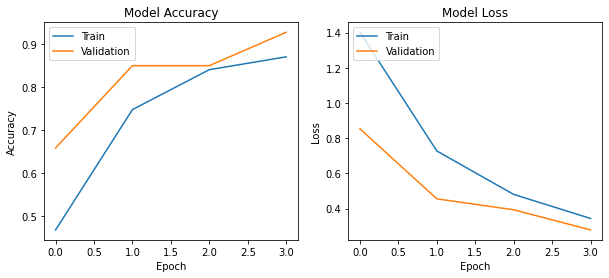

In [26]:
# After training, evaluate the model using the validation data
val_loss, val_accuracy = model.evaluate(val_generator)
print(f'Validation Loss: {round(val_loss,2)}')
print(f'Validation Accuracy: {round(val_accuracy,2)}')

# Plot the training history
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

3/3 [==============================] - 0s 72ms/step


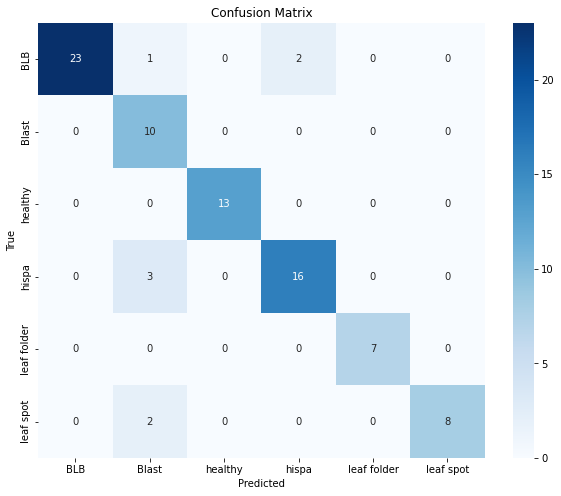

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict labels for the test set
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
true_classes = test_generator.classes

# Calculate the confusion matrix
confusion_mtx = confusion_matrix(true_classes, y_pred_classes)

# Calculate accuracy
accuracy = accuracy_score(true_classes, y_pred_classes)

# Generate a classification report
class_labels = list(test_generator.class_indices.keys())
classification_rep = classification_report(true_classes, y_pred_classes, target_names=class_labels)


# Generate a confusion matrix plot
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [28]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_image(image_path, model, class_labels, target_size=(128, 128)):
    # Load the image and resize it to the target size
    img = image.load_img(image_path, target_size=target_size)

    # Convert the image to a NumPy array and preprocess it
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize the image data

    # Use the trained model to make a prediction
    prediction = model.predict(img_array)

    # Get the class label with the highest probability
    predicted_class_idx = np.argmax(prediction)
    predicted_class_label = class_labels[predicted_class_idx]

    # Get the predicted class probability
    prediction_accuracy = prediction[0][predicted_class_idx]

    # Display the image
    plt.imshow(img)
    plt.axis('off')

    # Print the predicted class and accuracy
    print(f'Predicted Class: {predicted_class_label}')
    print(f'Prediction Accuracy: {prediction_accuracy:.2f}')

    return predicted_class_label, prediction_accuracy


1/1 [==============================] - 0s 59ms/step
Predicted Class: healthy
Prediction Accuracy: 1.00


('healthy', 0.9994136)

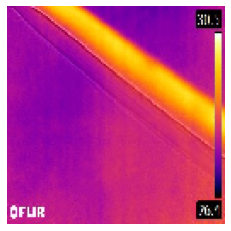

In [29]:

# Usage example:
image_path = 'thermal images UL/Test/healthy/thermalimage5c.jpg'
predict_image(image_path, model, list(train_generator.class_indices.keys()))


# VGG16

In [30]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models


In [31]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')


Found 635 images belonging to 6 classes.
Found 167 images belonging to 6 classes.
Found 85 images belonging to 6 classes.


In [32]:
base_model = VGG16(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False 

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [33]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=2,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size)


Epoch 1/2
19/19 [==============================] - 111s 6s/step - loss: 3.4169 - accuracy: 0.3184 - val_loss: 1.1311 - val_accuracy: 0.6000
Epoch 2/2
19/19 [==============================] - 105s 6s/step - loss: 1.1747 - accuracy: 0.5439 - val_loss: 0.9100 - val_accuracy: 0.6812


In [34]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Generate predictions on the test data
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Generate a classification report
class_labels = list(test_generator.class_indices.keys())
cls_report = classification_report(y_true, y_pred_classes, target_names=class_labels)
print(cls_report)

# Save the trained model
model.save('vgg16_model.h5')


3/3 [==============================] - 13s 4s/step - loss: 0.9145 - accuracy: 0.7412
Test Loss: 0.9145
Test Accuracy: 0.7412
3/3 [==============================] - 11s 3s/step
              precision    recall  f1-score   support

         BLB       0.31      0.42      0.36        26
       Blast       0.00      0.00      0.00        10
     healthy       0.19      0.23      0.21        13
       hispa       0.20      0.21      0.21        19
 leaf folder       0.00      0.00      0.00         7
   leaf spot       0.00      0.00      0.00        10

    accuracy                           0.21        85
   macro avg       0.12      0.14      0.13        85
weighted avg       0.17      0.21      0.19        85



C:\Users\karthik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\karthik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\karthik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

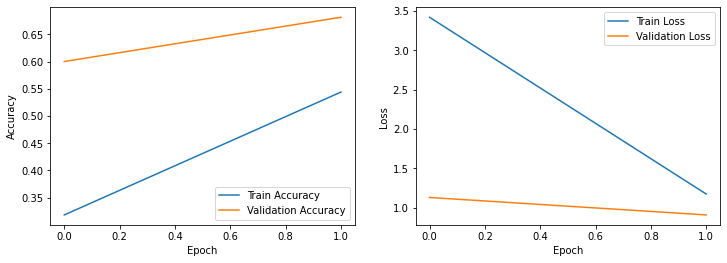

In [35]:

# Optionally, plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

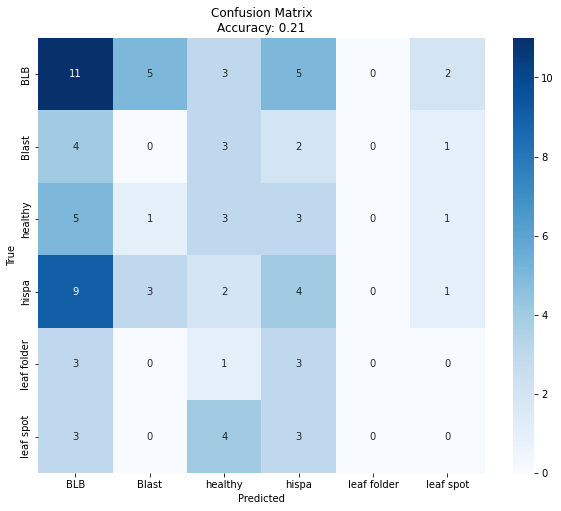

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Calculate the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred_classes)

# Generate a confusion matrix plot
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}')
plt.show()


In [37]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def predict_vgg16_image(image_path, model, class_labels, target_size=(224, 224)):

    # Load the image and resize it to the target size
    img = image.load_img(image_path, target_size=target_size)

    # Convert the image to a NumPy array and preprocess it
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize the image data

    # Use the trained VGG16 model to make a prediction
    prediction = model.predict(img_array)

    # Get the class label with the highest probability
    predicted_class_idx = np.argmax(prediction)
    predicted_class_label = class_labels[predicted_class_idx]

    # Get the predicted class probability
    prediction_confidence = prediction[0][predicted_class_idx]

    # Display the image
    plt.imshow(img)
    plt.axis('off')

    # Print the predicted class and confidence
    print(f'Predicted Class: {predicted_class_label}')
    print(f'Prediction Confidence: {prediction_confidence:.2f}')

    return predicted_class_label, prediction_confidence


1/1 [==============================] - 0s 282ms/step
Predicted Class: healthy
Prediction Confidence: 0.40


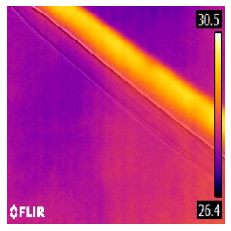

In [38]:
#  example:
image_path = 'thermal images UL/Test/healthy/thermalimage5c.jpg'
predicted_class, predicted_confidence = predict_vgg16_image(image_path, model, list(train_generator.class_indices.keys()))


# RESNET50

In [39]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming train_dir, val_dir, and test_dir are already defined as in the original code.

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

base_model = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the convolutional base

# Note that a GlobalAveragePooling layer is often used with ResNet models
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=2,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size)

# ... rest of the code for evaluation, predictions, and plotting remains the same ...

Found 635 images belonging to 6 classes.
Found 167 images belonging to 6 classes.
Found 85 images belonging to 6 classes.
Epoch 1/2
19/19 [==============================] - 58s 3s/step - loss: 1.9355 - accuracy: 0.2488 - val_loss: 1.7023 - val_accuracy: 0.2062
Epoch 2/2
19/19 [==============================] - 53s 3s/step - loss: 1.6810 - accuracy: 0.3367 - val_loss: 1.6746 - val_accuracy: 0.3187


In [40]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Generate predictions on the test data
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Generate a classification report
class_labels = list(test_generator.class_indices.keys())
cls_report = classification_report(y_true, y_pred_classes, target_names=class_labels)
print(cls_report)

# Save the trained model
model.save('resnet_model.h5')


3/3 [==============================] - 7s 2s/step - loss: 1.6893 - accuracy: 0.3059
Test Loss: 1.6893
Test Accuracy: 0.3059
3/3 [==============================] - 8s 2s/step
              precision    recall  f1-score   support

         BLB       0.31      1.00      0.47        26
       Blast       0.00      0.00      0.00        10
     healthy       0.00      0.00      0.00        13
       hispa       0.00      0.00      0.00        19
 leaf folder       0.00      0.00      0.00         7
   leaf spot       0.00      0.00      0.00        10

    accuracy                           0.31        85
   macro avg       0.05      0.17      0.08        85
weighted avg       0.09      0.31      0.14        85



C:\Users\karthik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\karthik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\karthik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

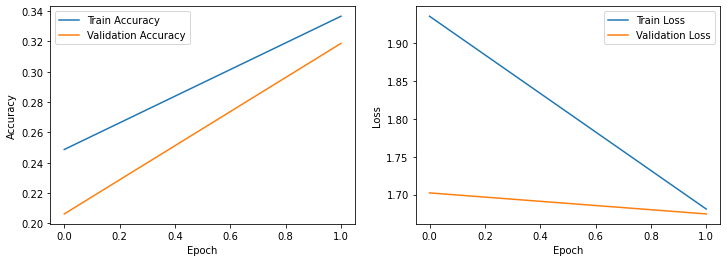

In [41]:

# Optionally, plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

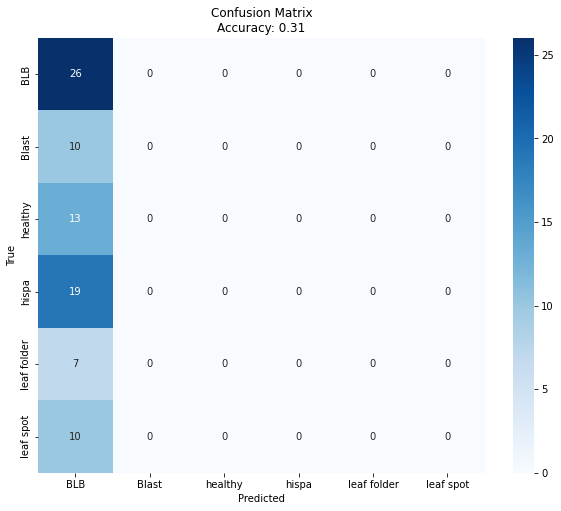

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Calculate the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred_classes)

# Generate a confusion matrix plot
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}')
plt.show()


In [43]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def predict_resnet50_image(image_path, model, class_labels, target_size=(224, 224)):
    # Load the image and resize it to the target size
    img = image.load_img(image_path, target_size=target_size)

    # Convert the image to a NumPy array and preprocess it
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize the image data

    # Use the trained ResNet50 model to make a prediction
    prediction = model.predict(img_array)

    # Get the class label with the highest probability
    predicted_class_idx = np.argmax(prediction)
    predicted_class_label = class_labels[predicted_class_idx]

    # Get the predicted class probability
    prediction_confidence = prediction[0][predicted_class_idx]

    # Display the image
    plt.imshow(img)
    plt.axis('off')

    # Print the predicted class and confidence
    print(f'Predicted Class: {predicted_class_label}')
    print(f'Prediction Confidence: {prediction_confidence:.2f}')

    return predicted_class_label, prediction_confidence



1/1 [==============================] - 1s 812ms/step
Predicted Class: BLB
Prediction Confidence: 0.34


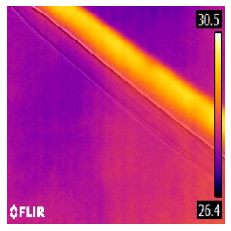

In [44]:
# Usage example:
image_path = 'thermal images UL/Test/healthy/thermalimage5c.jpg'
predicted_class, predicted_confidence = predict_resnet50_image(image_path, model, list(train_generator.class_indices.keys()))

# INCEPTION V3

In [45]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Data preparation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(299, 299),  # InceptionV3 uses an image size of 299x299
    batch_size=32,
    class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical')

# InceptionV3 model
base_model = InceptionV3(input_shape=(299, 299, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the convolutional base

# Custom layers
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')  # Multi-class classification
])

# Compilation of the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model Training
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=2,  # Adjust the number of epochs based on your needs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size)


Found 635 images belonging to 6 classes.
Found 167 images belonging to 6 classes.
Found 85 images belonging to 6 classes.
Epoch 1/2
19/19 [==============================] - 58s 3s/step - loss: 1.8632 - accuracy: 0.3101 - val_loss: 1.3976 - val_accuracy: 0.4313
Epoch 2/2
19/19 [==============================] - 55s 3s/step - loss: 1.4856 - accuracy: 0.3881 - val_loss: 1.2374 - val_accuracy: 0.5125


In [46]:

# Model Evaluation
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Model Prediction
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Classification Report
class_labels = list(test_generator.class_indices.keys())
cls_report = classification_report(y_true, y_pred_classes, target_names=class_labels)
print(cls_report)

# Model Saving
model.save('inceptionv3_model.h5')


3/3 [==============================] - 6s 2s/step - loss: 1.2562 - accuracy: 0.4588
Test Loss: 1.2562
Test Accuracy: 0.4588
3/3 [==============================] - 6s 2s/step
              precision    recall  f1-score   support

         BLB       0.32      0.77      0.45        26
       Blast       0.00      0.00      0.00        10
     healthy       0.17      0.15      0.16        13
       hispa       0.33      0.16      0.21        19
 leaf folder       0.00      0.00      0.00         7
   leaf spot       0.00      0.00      0.00        10

    accuracy                           0.29        85
   macro avg       0.14      0.18      0.14        85
weighted avg       0.20      0.29      0.21        85



C:\Users\karthik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\karthik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\karthik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

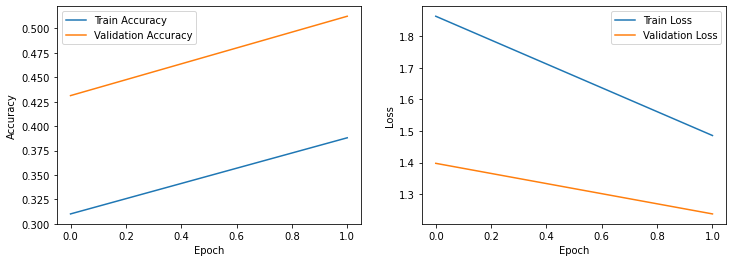

In [47]:

# Model Visualization
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

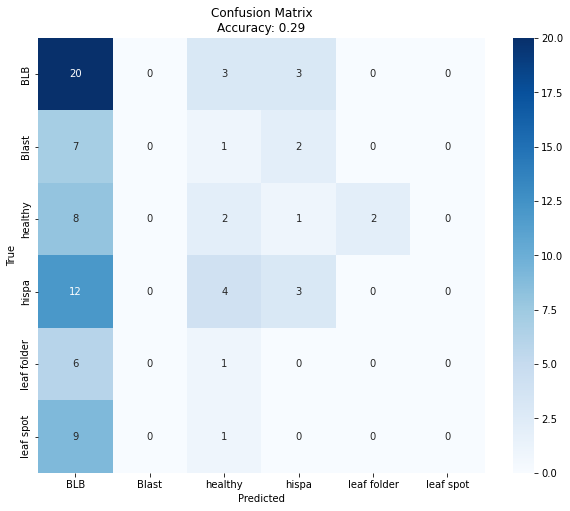

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Calculate the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred_classes)

# Generate a confusion matrix plot
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}')
plt.show()


In [49]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def predict_inceptionv3_image(image_path, model, class_labels, target_size=(299, 299)):
    # Load the image and resize it to the target size for InceptionV3 input
    img = image.load_img(image_path, target_size=target_size)

    # Convert the image to a NumPy array and preprocess it
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize the image data

    # Use the trained InceptionV3 model to make a prediction
    prediction = model.predict(img_array)

    # Get the class label with the highest probability
    predicted_class_idx = np.argmax(prediction)
    predicted_class_label = class_labels[predicted_class_idx]

    # Get the predicted class probability
    prediction_confidence = prediction[0][predicted_class_idx]

    # Display the image
    plt.imshow(img)
    plt.axis('off')

    # Print the predicted class and confidence
    print(f'Predicted Class: {predicted_class_label}')
    print(f'Prediction Confidence: {prediction_confidence:.2f}')

    return predicted_class_label, prediction_confidence


1/1 [==============================] - 1s 1s/step
Predicted Class: healthy
Prediction Confidence: 0.55


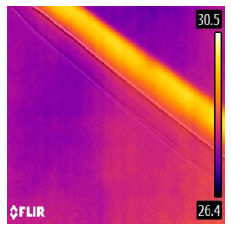

In [50]:
# Usage example:
image_path = 'thermal images UL/Test/healthy/thermalimage5c.jpg'
predicted_class, predicted_confidence = predict_inceptionv3_image(image_path, model, list(train_generator.class_indices.keys()))

# ALEXNET

In [51]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam


# Data preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(227, 227),
    batch_size=64,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(227, 227),
    batch_size=64,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(227, 227),
    batch_size=64,
    class_mode='categorical')

# AlexNet model architecture
model = Sequential([
    # 1st Convolutional Layer
    Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),

    # 2nd Convolutional Layer
    Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),

    # 3rd, 4th, and 5th Convolutional Layers
    Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'),
    Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'),
    Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),

    # Flattening before fully connected layers
    Flatten(),

    # 1st Dense Layer
    Dense(4096, activation='relu'),
    Dropout(0.5),

    # 2nd Dense Layer
    Dense(4096, activation='relu'),
    Dropout(0.5),

    # Output Layer
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

# Print model summary
model.summary()

# Model training
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=2,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size)


Found 635 images belonging to 6 classes.
Found 167 images belonging to 6 classes.
Found 85 images belonging to 6 classes.
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_99 (Conv2D)          (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization_94 (Bat  (None, 55, 55, 96)       384       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 27, 27, 96)       0         
 2D)                                                             
                                                                 
 conv2d_100 (Conv2D)         (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_95 (Bat  (None, 27, 27, 256)      1024     

In [52]:

# Model evaluation
test_loss, test_accuracy = model.evaluate(test_generator)

print(f'Test Accuracy: {test_accuracy:.4f}')

# Save model
model.save('alexnet_model.h5')


2/2 [==============================] - 1s 242ms/step - loss: 1.7509 - accuracy: 0.3059
Test Accuracy: 0.3059


2/2 [==============================] - 1s 235ms/step


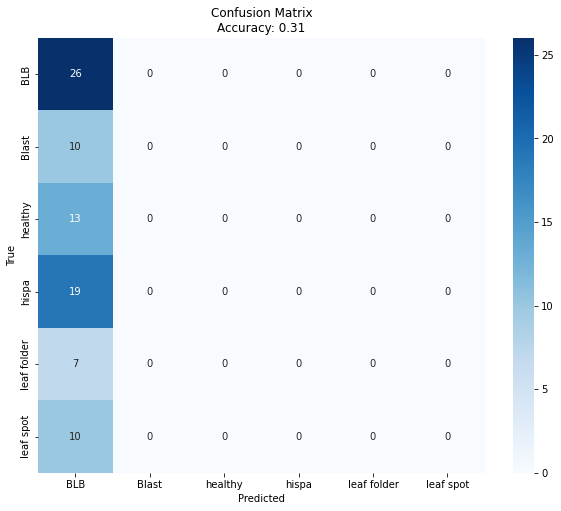

In [53]:
# Calculate the confusion matrix
y_pred_classes = np.argmax(model.predict(test_generator), axis=1)
y_true = test_generator.classes
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred_classes)

# Generate a confusion matrix plot
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}')
plt.show()


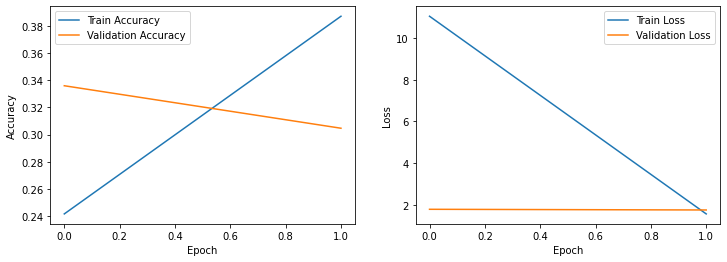

In [54]:

# Optional: Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def predict_alexnet_image(image_path, model, class_labels, target_size=(227, 227)):
    # Load the image and resize it to the target size for AlexNet input
    img = image.load_img(image_path, target_size=target_size)

    # Convert the image to a NumPy array and preprocess it
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize the image data

    # Use the trained AlexNet model to make a prediction
    prediction = model.predict(img_array)

    # Get the class label with the highest probability
    predicted_class_idx = np.argmax(prediction)
    predicted_class_label = class_labels[predicted_class_idx]

    # Get the predicted class probability
    prediction_confidence = prediction[0][predicted_class_idx]

    # Display the image
    plt.imshow(img)
    plt.axis('off')

    # Print the predicted class and confidence
    print(f'Predicted Class: {predicted_class_label}')
    print(f'Prediction Confidence: {prediction_confidence:.2f}')

    return predicted_class_label, prediction_confidence


1/1 [==============================] - 0s 113ms/step
Predicted Class: BLB
Prediction Confidence: 0.20


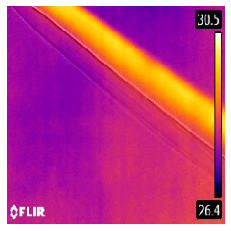

In [56]:
# Usage example:
image_path = 'thermal images UL/Test/healthy/thermalimage5c.jpg'
predicted_class, predicted_confidence = predict_alexnet_image(image_path, model, list(train_generator.class_indices.keys()))

# MOBILENET

In [57]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Data preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

# MobileNet model architecture
base_model = MobileNet(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the base model

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# This is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)


Found 635 images belonging to 6 classes.
Found 167 images belonging to 6 classes.
Found 85 images belonging to 6 classes.
17225924/17225924 [==============================] - 1s 0us/step
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
    

In [58]:

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)

print(f"Test Accuracy: {test_accuracy}")

# Save the model
model.save('mobilenet_model.h5')


2/2 [==============================] - 2s 371ms/step - loss: 0.7991 - accuracy: 0.7059
Test Accuracy: 0.7058823704719543


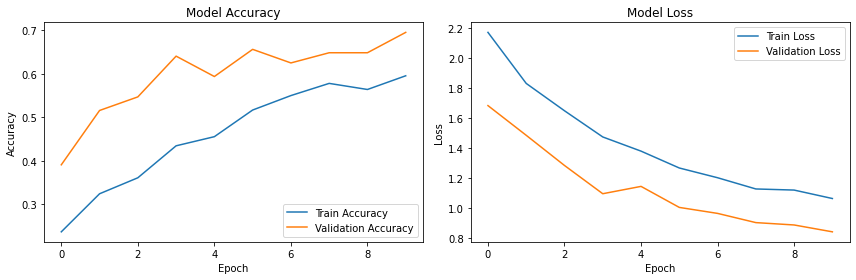

In [59]:

# Plot the training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

In [60]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

# Generate predictions for the test dataset
test_predictions_probs = model.predict(test_generator)
test_predictions = np.argmax(test_predictions_probs, axis=1)

# Get true class labels
y_true = test_generator.classes

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, test_predictions)

2/2 [==============================] - 3s 519ms/step


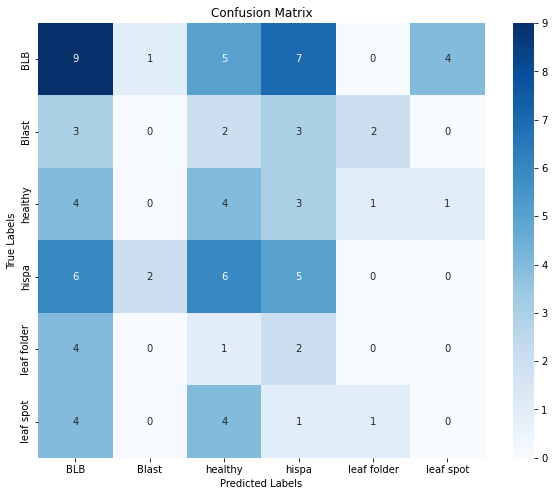

In [61]:
class_labels = list(test_generator.class_indices.keys())  # Get class labels

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def predict_single_image(image_path, model, class_labels, target_size=(224, 224)):
    # Load and preprocess image
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    img_preprocessed = img_array_expanded_dims / 255.0
    
    # Predict
    prediction = model.predict(img_preprocessed)
    
    # Get class with highest probability
    predicted_class_index = np.argmax(prediction)
    predicted_class_label = class_labels[predicted_class_index]
    
    # Get prediction confidence
    prediction_confidence = np.max(prediction)

    # Display the image
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
    # Print the predicted class and confidence
    print(f'Predicted Class: {predicted_class_label}')
    print(f'Prediction Confidence: {prediction_confidence:.2f}')
    
    return predicted_class_label, prediction_confidence

1/1 [==============================] - 0s 474ms/step


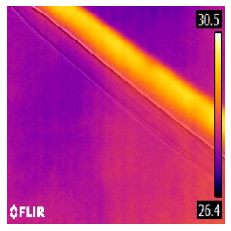

Predicted Class: healthy
Prediction Confidence: 0.57


In [63]:
image_path = 'thermal images UL/Test/healthy/thermalimage5c.jpg'
predicted_class, predicted_confidence = predict_single_image(image_path, model, list(train_generator.class_indices.keys()))